# OneClassSVM

In [65]:
import pandas as pd
import numpy as np

data = pd.read_csv("./data_pretraite_svm.csv", sep=';', index_col = 0)
data.head()

,N20,soilH_H1,soilH_H2,NO3_H1,NO3_H2,NH4_H1,NH4_H2,Temp moyenne (°C) J1,Humidité moyenne (%) J1,Temp moyenne (°C) J7,...,Temp min J30,acs,bi,bio,elev,pn,ref,week,month,year
0,18.537129,0.214182,0.197413,18.727429,11.471587,62.840091,8.822290,73.0,8.8,84.571429,...,0.973333,1.0,0.0,0.0,0.0,0.0,0.0,11,3,2018
1,1.488817,0.221340,0.222435,1.472030,2.484917,1.484297,1.906418,73.0,8.8,84.571429,...,0.973333,0.0,1.0,0.0,0.0,0.0,0.0,11,3,2018
2,1.390654,0.212602,0.214897,1.594965,2.647370,1.933291,2.426755,73.0,8.8,84.571429,...,0.973333,0.0,0.0,1.0,0.0,0.0,0.0,11,3,2018
3,3.297613,0.210646,0.202263,0.614166,1.104807,1.276502,1.688957,73.0,8.8,84.571429,...,0.973333,0.0,0.0,0.0,1.0,0.0,0.0,11,3,2018
4,2.088998,0.214570,0.224213,0.727448,0.870433,1.612510,2.110141,73.0,8.8,84.571429,...,0.973333,0.0,0.0,0.0,0.0,1.0,0.0,11,3,2018


In [66]:
X = data.copy()
print(range(X.shape[1]))
# print(X.columns[23])
# X.isna().sum()

range(0, 36)


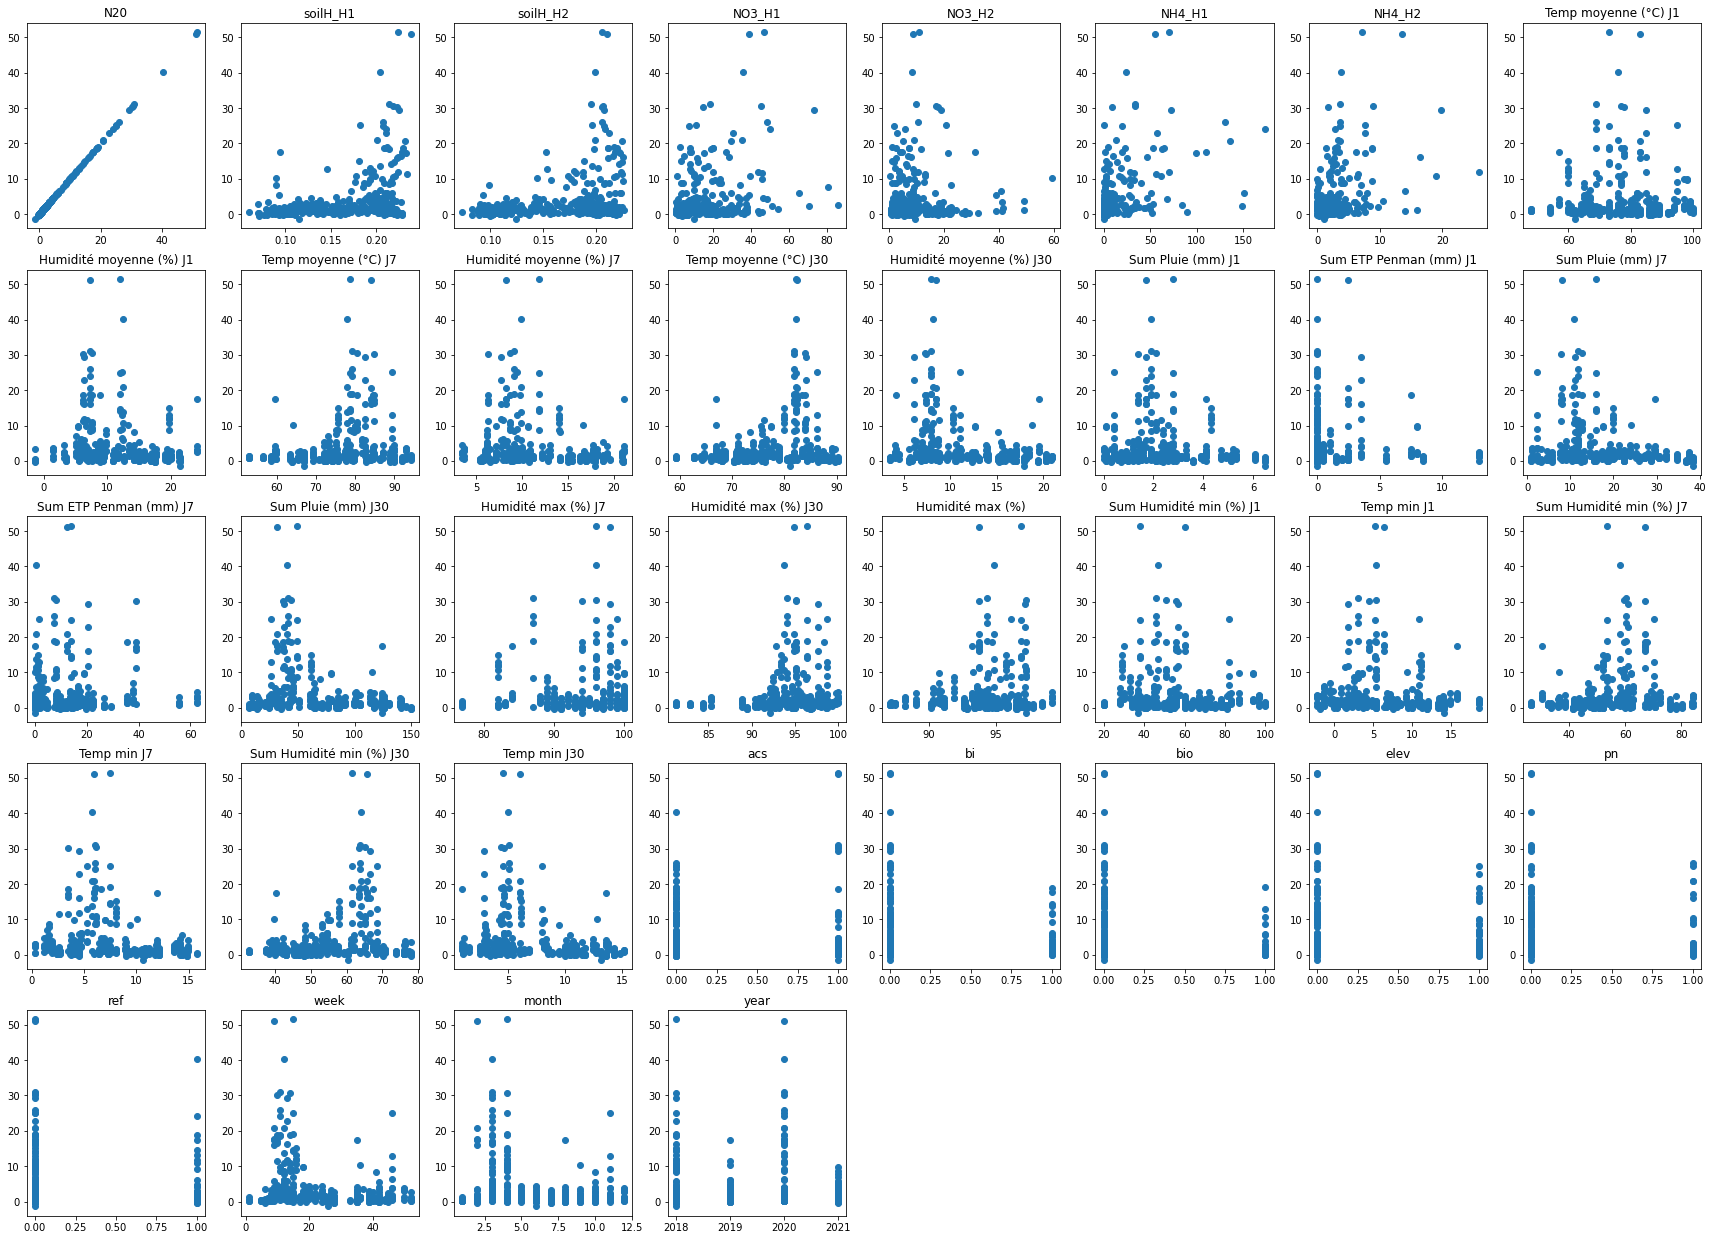

In [67]:
import matplotlib.pyplot as plt


plt.figure(figsize=(30,10))

for i, name_c in enumerate(X.columns) :
    plt.subplot(6,8,i + 1)
    plt.subplots_adjust(bottom=1, top=3) 
    plt.scatter(X[name_c], X[X.columns[:1]])
    plt.title(name_c)


Text(0.5, 1.0, 'Only N2O')

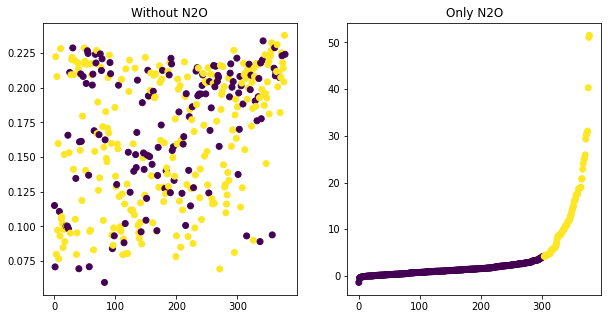

In [78]:
from sklearn.svm import OneClassSVM

train = X
train = train.sort_values( by = 'N20')
y = train[train.columns[:1]]
train = train[train.columns[1:]]


clf = OneClassSVM(gamma= 'auto', nu = 0.2, kernel= 'rbf') 
clf.fit(train)
Z = clf.predict(train)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(range(len(train[train.columns[:1]])),train[train.columns[:1]], c= Z)
plt.title("Without N2O")


clf_y = OneClassSVM(gamma= 'auto', nu = 0.8, kernel= 'linear')
clf_y.fit(y)
Z_y = clf_y.predict(y)
plt.subplot(1,2,2)
plt.scatter(range(len(y)),y, c= Z_y)
plt.title("Only N2O")


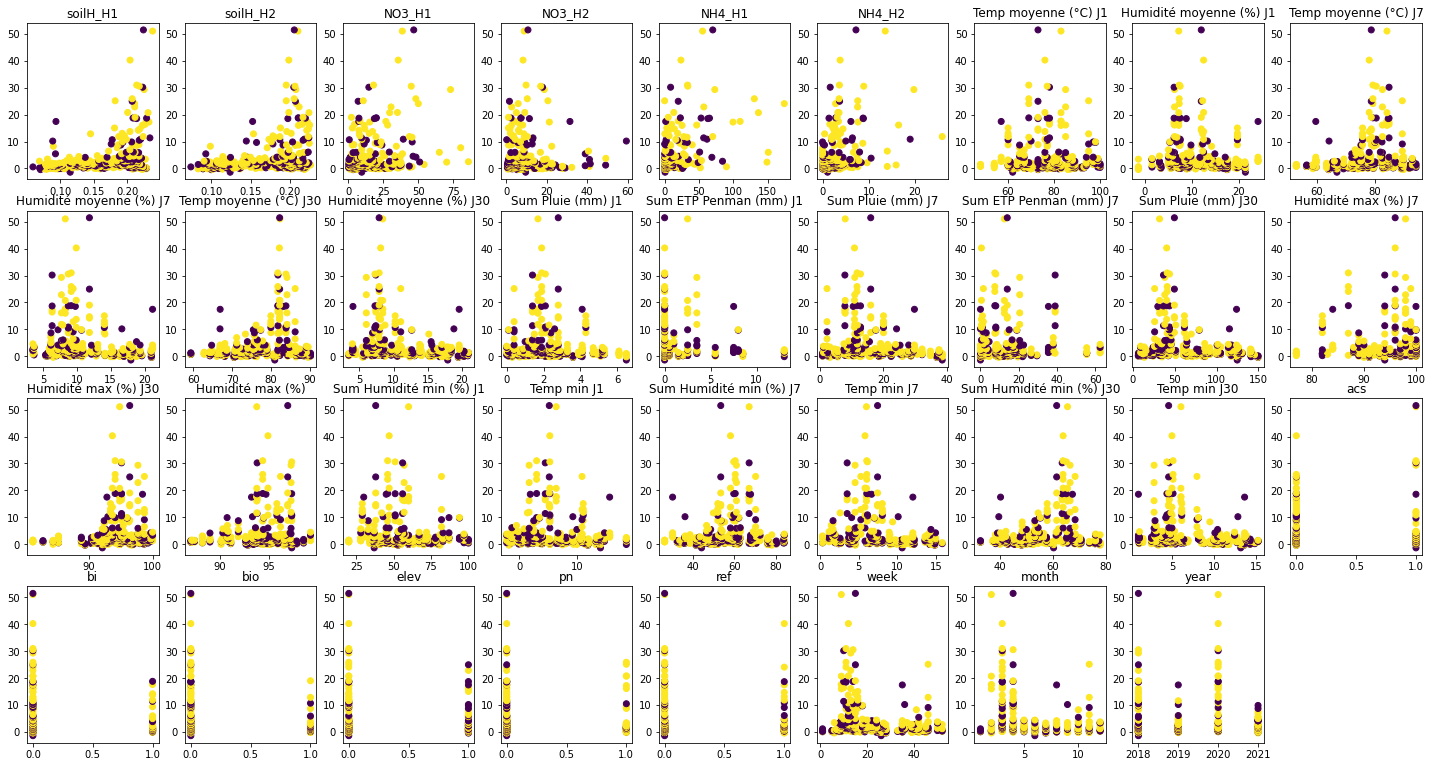

In [84]:
Z = clf.predict(train)
Z = Z.reshape(-1,1)

plt.figure(figsize=(25,5))
# plt.scatter(X[X.columns[:1]], X[X.columns[:1]], c= Z)
# for i, name_c in enumerate(train.columns) :
for i, name_c in enumerate(train) :
    plt.subplot(4,9,i + 1)
    # plt.scatter(train[name_c],train[train.columns[:1]], c= Z)
    plt.subplots_adjust(bottom=1, top=3) 
    plt.scatter(train[name_c],y, c= Z)
    plt.title(name_c)

    # plt.scatter(X1[:, i],X1[:, 0], c= Z)
    # plt.scatter(X_selected[:, i],y, c= Z)